# Import library

In [ ]:
!pip install -q timm
!pip install -U -q git+https://github.com/albumentations-team/albumentations

In [ ]:
!pip uninstall -y opencv-python-headless==4.5.5.62

Found existing installation: opencv-python-headless 4.5.2.52
Uninstalling opencv-python-headless-4.5.2.52:
  Successfully uninstalled opencv-python-headless-4.5.2.52


In [ ]:
!pip install opencv-python-headless==4.5.2.52

  Using cached opencv_python_headless-4.5.2.52-cp37-cp37m-manylinux2014_x86_64.whl (38.2 MB)


In [ ]:
import csv
import pandas as pd
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import random

In [ ]:
import imagesize
from collections import Counter
import seaborn as sns
from tqdm import tqdm

In [ ]:
from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torch.optim as optim
import timm
from timm.models.efficientnet import default_cfgs 

device     = torch.device("cuda" if torch.cuda.is_available() else "cpu")
import albumentations as  A



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd content

[Errno 2] No such file or directory: 'content'
/content


In [ ]:
!pwd

/content


In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c super-ai-engineer-2021-house-grade-classification

100% 2.31G/2.31G [00:35<00:00, 89.7MB/s]
100% 2.31G/2.31G [00:35<00:00, 69.9MB/s]


# Import dataset for all task


In [ ]:
# !pip install --upgrade --no-cache-dir gdown

In [ ]:
# !gdown --id 1alcakzFzTcE8F4rYp-F5aysDAzUA7Fcq

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1alcakzFzTcE8F4rYp-F5aysDAzUA7Fcq
To: /content/resnet50.pth.tar
100% 310M/310M [00:06<00:00, 48.4MB/s]


In [ ]:
#Unzip all file : 
!mkdir Task1:House_grade_prediction
!cp super-ai-engineer-2021-house-grade-classification.zip Task1:House_grade_prediction/
%cd /content/Task1:House_grade_prediction
!unzip -qq super-ai-engineer-2021-house-grade-classification.zip
%cd ..

/content/Task1:House_grade_prediction
/content


# Task1 : House Grade dataset visualize

In [ ]:
HG_dataset = pd.read_csv('/content/Task1:House_grade_prediction/train.csv')

In [ ]:
HG_dataset

,image_name,class
0,ChokChai4_img_13-7956791_100-6031267_a187-2159...,0
1,ChokChai4_img_13-7961753_100-6031881_a185-9785...,0
2,ChokChai4_img_13-7969811_100-5906061_a180-5812...,0
3,ChokChai4_img_13-7970811_100-5906071_a180-5812...,0
4,ChokChai4_img_13-7971811_100-5906081_a180-5812...,0
...,...,...
2948,MrtSutthisan_img_13-7986837_100-5730268_a260_s...,5
2949,MrtSutthisan_img_13-7990804_100-5729745_a170_s...,5
2950,MrtSutthisan_img_13-7991266_100-5728237_a255_s...,5
2951,MrtSutthisan_img_13-7992342_100-5710656_a55_s9...,5


In [ ]:
def plot_image(df) :
  fig,ax = plt.subplots(2,5,figsize = (20,10))
  idx = 0

  for row in range(2) :
    for col in range(5) :
      num = random.randint(0, len(df) - 1)
      image = plt.imread(im_path + (df['image_name'])[num])
      #plot image
      ax[row][col].imshow(image)
      #plot title name
      ax[row][col].set_title("class : " + str((df['class'])[num]))



In [ ]:
plot_image(hg5)

In [ ]:
#counts value from each class :
class_counts = HG_dataset['class'].value_counts()
class_counts

0    1520
4     632
5     347
3     318
2      97
1      39
Name: class, dtype: int64

In [ ]:
import plotly.express as px

fig = px.histogram(HG_dataset, x="class")
fig.update_layout(bargap=0.2)
fig.show()

In [ ]:
im_path = '/content/Task1:House_grade_prediction/train/'

In [ ]:
def calc_imsize(df) : 
  #df = str(df)
  width, height = imagesize.get(im_path + df)
  return ('width : {} height : {}'.format(width, height))

In [ ]:
def add_imsize_to_df(df) :
  df['image_size'] = df['image_name'].copy()
  for i in range(len(df)) :
    xx = calc_imsize((df['image_name'])[i])
    (df['image_size'])[i] = xx

  return df

In [ ]:
HG_dataset = add_imsize_to_df(HG_dataset)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
HG_dataset.columns

Index(['image_name', 'class', 'image_size'], dtype='object')

In [ ]:
hg0 = HG_dataset[HG_dataset['class'] == 0]
hg1 = HG_dataset[HG_dataset['class'] == 1]
hg2 = HG_dataset[HG_dataset['class'] == 2]
hg3 = HG_dataset[HG_dataset['class'] == 3]
hg4 = HG_dataset[HG_dataset['class'] == 4]
hg5 = HG_dataset[HG_dataset['class'] == 5]

hg0 = hg0.reset_index()
hg1 = hg1.reset_index()
hg2 = hg2.reset_index()
hg3 = hg3.reset_index()
hg4 = hg4.reset_index()
hg5 = hg5.reset_index()

In [ ]:
HG_dataset['image_size'].value_counts()

width : 640 height : 640     2657
width : 1920 height : 925     296
Name: image_size, dtype: int64

In [ ]:
#split train val set 
df_train, df_val = train_test_split(HG_dataset, test_size = 0.1, random_state = 42)
df_train = df_train.reset_index(drop = True)
df_train.shape, df_val.shape

((2657, 3), (296, 3))

In [ ]:
df_train.columns

Index(['image_name', 'class', 'image_size'], dtype='object')

# **Task1 : Load data as a batch**

In [ ]:
import torchvision.transforms as transforms
from torchvision.utils import save_image
from torch.utils.data import Dataset
from PIL import Image
import time

In [ ]:
# !cp /content/drive/MyDrive/Hack5:Image_classification/Datasets/augmented_data_10000.zip /content/
# !cp /content/drive/MyDrive/Hack5:Image_classification/Datasets/augmented10000_data.csv /content/

In [ ]:
# !unzip -qq /content/augmented_data_10000.zip

In [ ]:
train_df = pd.read_csv('/content/augmented10000_data.csv')
train_df.head(10)
train_df = train_df.drop(columns = ['index'])

In [ ]:
#convert columns type : 
train_df['classes'] = train_df['classes'].astype(int)

In [ ]:
type((train_df['classes'])[0])

numpy.int64

In [ ]:
# Delete class 0 from dataset : 

train_df = train_df[train_df['classes'] != 0]
train_df = train_df.reset_index()
train_df = train_df.drop(columns = ['index'])
train_df

,image_name,classes
0,hg1839.jpg,1
1,hg1322.jpg,1
2,hg1966.jpg,1
3,hg1711.jpg,1
4,hg11096.jpg,1
...,...,...
8013,hg5371.jpg,5
8014,hg5370.jpg,5
8015,hg51384.jpg,5
8016,hg51134.jpg,5


In [ ]:
for idx in range(len(train_df)) :
  (train_df['classes'])[idx] = ((train_df['classes'])[idx]) - 1

train_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,image_name,classes
0,hg1839.jpg,0
1,hg1322.jpg,0
2,hg1966.jpg,0
3,hg1711.jpg,0
4,hg11096.jpg,0
...,...,...
8013,hg5371.jpg,4
8014,hg5370.jpg,4
8015,hg51384.jpg,4
8016,hg51134.jpg,4


In [ ]:
#Shuffle df before split :

train_df = train_df.sample(frac=1).reset_index(drop=True)
train_df

,image_name,classes
0,hg21187.jpg,1
1,hg21284.jpg,1
2,hg4462.jpg,3
3,hg5491.jpg,4
4,hg11161.jpg,0
...,...,...
8013,hg3365.jpg,2
8014,hg5696.jpg,4
8015,hg1360.jpg,0
8016,hg1381.jpg,0


In [ ]:
#split train val set 
df_train, df_val = train_test_split(train_df, test_size = 0.2, random_state = 42)
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_train.shape, df_val.shape

((6414, 2), (1604, 2))

In [ ]:
df_val.classes.value_counts()

2    341
4    341
1    340
0    296
3    286
Name: classes, dtype: int64

In [ ]:
from torchvision.transforms.autoaugment import RandAugment
from torchvision.transforms.functional import posterize

torchvision_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.RandAugment(),
    transforms.ToTensor(),
])

torchvision_transform_validate = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    #transforms.RandAugment(),
    transforms.ToTensor(),
])



In [ ]:
img_size = 224
file_paths = '/content/augmented_data'

class ImageDataset(torch.utils.data.Dataset):
    def __init__(self, df, file_paths,transforms = None, img_size = img_size):
        self.file_paths = file_paths
        self.X = list(df['image_name'])
        self.y =list(df['classes'])
        self.img_size = img_size
        self.transforms = transforms

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):

      # img = plt.imread(str(self.file_paths) + '/' + self.X[idx])
      # img=Image.fromarray(img).convert('RGB')
      # img=np.array(img).astype(np.uint8)

       #  image = Image.open(str(self.file_paths) + '/' + self.X[idx]).convert('RGB')
      #  image = np.asarray(image) / 255
      #  image_tensor = torch.from_numpy(image)
      #  image = image.astype('uint8')

      image = cv2.imread(str(self.file_paths) + '/' + self.X[idx])
      image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
      # image = (image)/(255)
      image = cv2.resize(image, (self.img_size, self.img_size), 3)
     

      if  self.transforms is not None :
        im = self.transforms(image) 

      return {'image': torch.FloatTensor(im), 'label': self.y[idx]}


In [ ]:
train_dataset = ImageDataset(df_train,
                             file_paths,
                             transforms =torchvision_transform,
                             img_size = img_size )

val_dataset = ImageDataset(df_val,
                           file_paths,
                           transforms =torchvision_transform_validate,
                           img_size = img_size)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size = batch_size, shuffle = True)
val_loader = DataLoader(val_dataset, batch_size = batch_size, shuffle = False)

In [ ]:
for batch in val_loader :
  print(batch['image'].shape)
  print(batch['label'].shape)
  break

torch.Size([64, 3, 224, 224])
torch.Size([64])


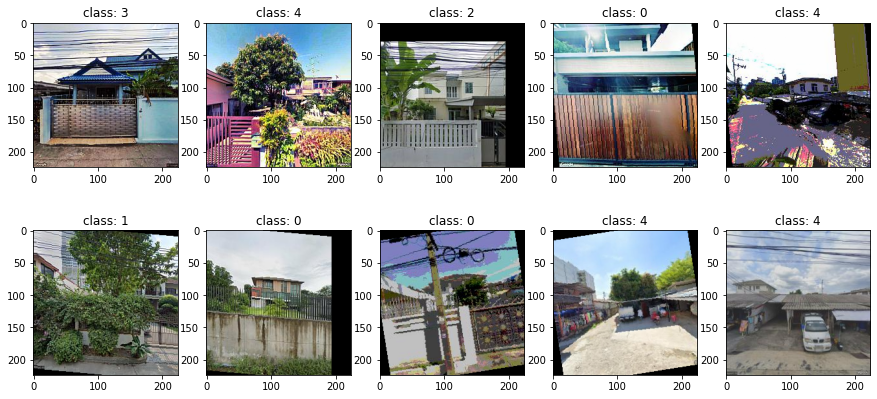

In [ ]:
# Plot Images
idxs = np.random.choice(range(len(train_dataset)), 10, replace=False)
fig,ax = plt.subplots(2,5,figsize = (15,7))
idx = 0
for i in range(2):
    for j in range(5):
        ax[i][j].imshow(train_dataset[idxs[idx]]['image'].permute(1, 2, 0))
        ax[i][j].set_title("class: "+str(train_dataset[idxs[idx]]['label']))
        idx+=1

# **Task1 : Model Declaration**

In [ ]:
class ClassifierModel(torch.nn.Module):
    def __init__(self,n_dim1 = 256,num_class=5,dropout_rate=0.2):
        super(ClassifierModel, self).__init__() 
        # defining our deep learning architecture
        # self.conv1 = torch.nn.Conv2d(1, 3, (3, 3), padding=(1, 1))
        self.resnet_model = timm.create_model(
                    'resnet50',
                    pretrained=True)
        self.droupout1 = torch.nn.Dropout(p=dropout_rate)
        self.droupout2 = torch.nn.Dropout(p=dropout_rate)

        self.fc1 = torch.nn.Linear(1000, n_dim1)
        self.fc2 = torch.nn.Linear(n_dim1, num_class)

    def forward(self, x,get_feat = False):
        # x = torch.unsqueeze(x, 1)
        # x = self.conv1(x)
        # x = torch.swapaxes(x, 1, -1)
        x = x / 255
        x = self.resnet_model(x)
        if not get_feat:
            x = self.droupout1(x)
            x = self._mlp(x)
            # x = torch.nn.functional.softmax(x,dim=1)
        return x
    
    def _mlp(self,x):
        x = self.fc1(x)
        x = torch.nn.functional.leaky_relu(x)
        x = self.droupout2(x)
        x = self.fc2(x)
        return x

model = ClassifierModel()
x = torch.randn((1,3,224,224))
model(x)#.argmax(axis=1)

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-rsb-weights/resnet50_a1_0-14fe96d1.pth" to /root/.cache/torch/hub/checkpoints/resnet50_a1_0-14fe96d1.pth


tensor([[ 1.1844, -2.5102, -1.5655, -2.4712,  0.4679]],
       grad_fn=<AddmmBackward0>)

# **Task1 : Training model**

In [ ]:
import os
import shutil
import sys
import time

In [ ]:
def compute_accuracy(logit,label):
    pred_label = logit.argmax(axis=1)
    return (pred_label==label).sum()/logit.shape[0]

In [ ]:
def stream(message) :
    try:
        sys.stdout.write("\r{%s}" % message)
    except:
        #Remove non-ASCII characters from message
        message = ''.join(i for i in message if ord(i)<128)
        sys.stdout.write("\r{%s}" % message)

In [ ]:
def compute_avg_w(l): # (data,num_batch)
    sum_w_loss = 0
    sum_w = 0
    for i in l:
        sum_w_loss+=i[0]*i[1]
        sum_w+=i[1]
    return sum_w_loss/sum_w

In [ ]:
def save_checkpoint(state, is_best, filename='checkpoint.pth.tar'):
    torch.save(state, filename)
    if is_best:
        shutil.copyfile(filename, 'model_best.pth.tar')

In [ ]:
# def train_log(loss, example_ct, epoch):
#     # Where the magic happens
#     wandb.log({"epoch": epoch, "loss": loss}, step=example_ct)
#     print(f"Loss after " + str(example_ct).zfill(5) + f" examples: {loss:.3f}")

In [ ]:
output_directory = '/content/Model_Weight_files/Aug_data_5_classes(house)'
patience = 5

In [ ]:
from sklearn.metrics import f1_score
def train_model(model, train_loader, val_loader, epochs):

    
    best_epoch = 0
    best_val_loss = np.inf
    #class_weights = torch.FloatTensor(weights).to(device)
    criterion = torch.nn.CrossEntropyLoss().to(device)
    optimizer = torch.optim.Adam(model.parameters(),  lr=0.001)
    

    # Tell wandb to watch what the model gets up to: gradients, weights, and more!
    #wandb.watch(model, criterion, log="all", log_freq=10)

    for epoch in range(epochs):
        print("Epoch :{}/{}".format(epoch+1, epochs))
        
        model.train()
        pred = []

        cnt = tqdm(enumerate(train_loader))

        for i, batch in cnt:
        
            start_time = time.time()
            optimizer.zero_grad()
            img = batch['image'].to(device)
            label = batch['label'].to(device)

            #img.swapaxes(1, 3)

            logit = model(img)
            loss = criterion(logit, label)
            loss.backward()
            optimizer.step()
            num_step = i + len(train_loader) * epoch
            step_loss = loss.item()
            step_accuracy = compute_accuracy(logit,label).item()
            pred+=[(step_accuracy,label.shape[0])]

            msg = f"| Epoch: {epoch+1}/{epochs} ({i+1}/{len(train_loader)}) | Loss: {step_loss:#.4} | Accuracy: {step_accuracy:#.4} | {1./(time.time() - start_time):#.3} steps/s | Step: {num_step//1000}k |"
            cnt.set_description(msg)
            # stream(msg)

        epoch_train_accuracy =compute_avg_w(pred)
        msg = f"\n\n| Train Accuracy: {epoch_train_accuracy:#.4} |"
        print(msg, flush = True)

        model.eval()
        losses = []
        pred = []

        y_true = []
        y_pred = []
        for i, batch in enumerate(val_loader) :
            img = batch['image'].to(device)
            label = batch['label'].to(device)

            #img = img.swapaxes(1, 3)
            
            with torch.no_grad():
                logit = model(img)
                loss = criterion(logit,label)
                y_true += label.tolist()
                y_pred += logit.argmax(axis=1).tolist()
            losses+=[(loss.item(),label.shape[0])]
            pred+=[(compute_accuracy(logit,label),label.shape[0])]
            F1 = f1_score(y_true, y_pred, average='macro')

        epoch_val_loss = compute_avg_w(losses)
        epoch_val_accuracy =compute_avg_w(pred).item()

        msg = f"| Val Loss: {epoch_val_loss:#.4} | Val Accuracy: {epoch_val_accuracy:#.4} | Macro_score :{F1:#.4} |\n"
        print(msg)

        if best_val_loss>=epoch_val_loss:
            best_val_loss = epoch_val_loss
            best_epoch = epoch
            # Save Best Checkpoint
            save_checkpoint({
                    'epoch': epoch + 1,
                    'state_dict': model.state_dict(),
                    'optimizer' : optimizer.state_dict(),
                }, is_best=False, filename=os.path.join(output_directory, 'best_checkpoint.pth.tar'.format(epoch)))
            
        if epoch-best_epoch>patience :
            break            

In [ ]:
CUDA_LAUNCH_BLOCKING = "1"
# model.to(device)
model = ClassifierModel(num_class = 5).to(device)


train_model(model, train_loader, val_loader, 40) 

# **Task1 : Inference**

In [ ]:
model_detect_house = ClassifierModel(num_class = 5).to(device)


model_chpt = torch.load("/content/Model_Weight_files/Aug_data_5_classes(house)/best_checkpoint.pth.tar")
model_detect_house.load_state_dict(model_chpt['state_dict'])

In [ ]:
test_torchvision_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    #transforms.RandAugment(),
    transforms.ToTensor(),
])

In [ ]:
# Load test set

# 224 for RESNET50 , 300 efn
img_size = 224
file_paths = '/content/Task1:House_grade_prediction/test'

class LoadTestset(torch.utils.data.Dataset):
    def __init__(self, df, file_paths,transforms = None, img_size = img_size):
        self.file_paths = file_paths
        self.X = list(df['image_name'])
        self.img_size = img_size
        self.transforms = transforms

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):

        image = cv2.imread(str(self.file_paths) + '/' + self.X[idx])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        # image = (image)/(255)
        image = cv2.resize(image, (self.img_size, self.img_size), 3)

        if  self.transforms is not None :
          im = self.transforms(image) 

        return {'image': torch.FloatTensor(im)}


In [ ]:
#find filename on test set

from os import walk

filenames = next(walk('/content/Task1:House_grade_prediction/test'), (None, None, []))[2]  # [] if no file
test_df = pd.DataFrame(filenames, columns = ['image_name'])
test_df


,image_name
0,ad6a7967.jpg
1,9f72698b.jpg
2,ea3d1db5.jpg
3,43c5b7da.jpg
4,aa9d5db0.jpg
...,...
445,9736ac21.jpg
446,c346950c.jpg
447,034c3c52.jpg
448,d011d8c4.jpg


In [ ]:
test_dataset = LoadTestset(test_df,
                           file_paths,
                           transforms = test_torchvision_transform,
                           img_size = img_size )

batch_size = 64
test_loader = DataLoader(test_dataset,
                         batch_size = batch_size,
                         shuffle = False)

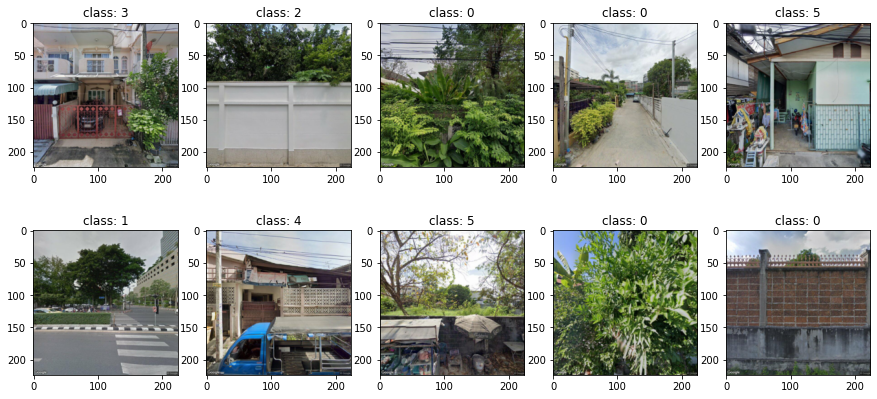

In [ ]:
# idxs = np.random.choice(range(len(eye_df)), 10, replace=False)
# fig,ax = plt.subplots(2,5,figsize = (15,7))
# idx = 0

# for i in range(2):
#     for j in range(5):
#         ax[i][j].imshow(eye_df[idxs[idx]]['image'].permute(1, 2, 0))
#         ax[i][j].set_title("class: "+str(eye_df[idxs[idx]]['label']))
#         idx+=1

In [ ]:
for batch in test_loader :
  print(batch['image'].shape)
  break

torch.Size([64, 3, 224, 224])


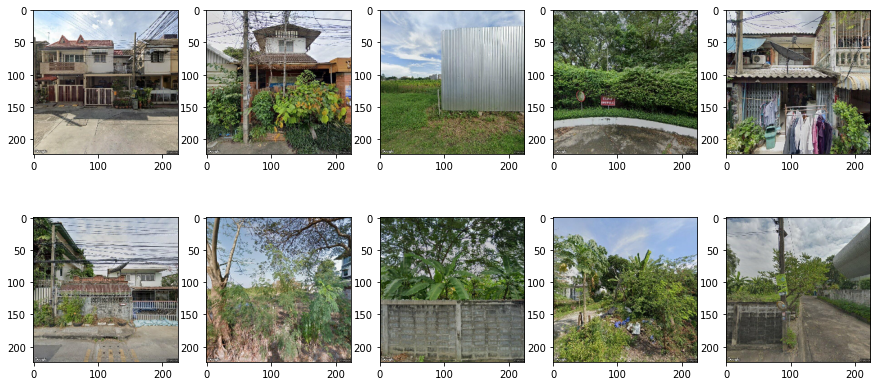

In [ ]:
# Plot Images
idxs = np.random.choice(range(len(test_dataset)), 10, replace=False)
fig,ax = plt.subplots(2,5,figsize = (15,7))
idx = 0
for i in range(2):
    for j in range(5):
        ax[i][j].imshow(test_dataset[idxs[idx]]['image'].permute(1, 2, 0))
        #ax[i][j].set_title("class: "+str(train_dataset[idxs[idx]]['label']))
        idx+=1

In [ ]:
pred = np.empty(len(test_dataset), dtype=int)

In [ ]:
model_for_test.eval()

for cnt, data in enumerate(test_loader):
  image = data['image'].to(device)
  # image = image.swapaxes(1, 3)
  result = model_for_test(image)
  if cnt == len(test_loader)-1:
    pred[cnt*batch_size:] = np.asarray(result.argmax(axis=1).cpu())
    break
  pred[cnt*batch_size:(cnt+1)*batch_size] = np.asarray(result.argmax(axis=1).cpu())

In [ ]:
pred

array([4, 4, 3, 5, 0, 4, 0, 0, 0, 0, 4, 0, 0, 4, 4, 0, 0, 4, 0, 5, 3, 5,
       0, 5, 0, 0, 4, 0, 0, 4, 0, 3, 0, 0, 0, 4, 4, 4, 4, 0, 0, 0, 0, 4,
       4, 0, 4, 0, 0, 4, 0, 0, 4, 0, 0, 0, 0, 5, 4, 5, 0, 4, 0, 0, 0, 0,
       4, 3, 4, 0, 2, 5, 0, 0, 5, 0, 0, 0, 5, 4, 4, 5, 0, 4, 4, 0, 0, 5,
       5, 0, 2, 4, 0, 4, 4, 4, 4, 3, 0, 0, 2, 0, 0, 3, 5, 4, 0, 0, 2, 0,
       0, 4, 0, 4, 0, 3, 2, 0, 4, 5, 4, 0, 0, 4, 4, 3, 0, 0, 0, 0, 0, 0,
       4, 5, 4, 0, 0, 5, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0,
       5, 4, 0, 0, 0, 0, 3, 0, 4, 4, 4, 0, 5, 4, 0, 0, 5, 3, 5, 0, 0, 0,
       4, 5, 5, 0, 5, 3, 4, 0, 5, 0, 5, 5, 0, 0, 2, 5, 0, 4, 0, 0, 0, 0,
       0, 3, 0, 4, 0, 0, 0, 0, 4, 0, 4, 0, 0, 0, 3, 3, 0, 4, 0, 4, 0, 5,
       0, 0, 0, 0, 0, 0, 0, 0, 5, 4, 0, 0, 4, 0, 0, 0, 5, 0, 4, 5, 3, 0,
       0, 0, 4, 2, 4, 4, 0, 0, 3, 4, 0, 5, 2, 0, 0, 0, 3, 0, 0, 0, 0, 5,
       3, 0, 4, 0, 3, 3, 4, 0, 4, 0, 4, 4, 4, 0, 0, 0, 3, 0, 4, 5, 0, 0,
       0, 0, 4, 0, 0, 4, 0, 0, 5, 0, 0, 4, 4, 0, 4,

In [ ]:
from glob import glob
img_dir_test = glob('/content/Task1:House_grade_prediction/test/*')

In [ ]:
test_name = [i.split('/')[-1].split('.')[0] for i in img_dir_test ]

In [ ]:
pd_Test = pd.DataFrame([test_name, pred]).T
pd_Test.columns = ['Id','Predicted']

In [ ]:
pd_Test

,Id,Predicted
0,ad6a7967,4
1,9f72698b,4
2,ea3d1db5,3
3,43c5b7da,5
4,aa9d5db0,0
...,...,...
445,9736ac21,3
446,c346950c,4
447,034c3c52,0
448,d011d8c4,4


In [ ]:
sample_sub_csv = pd.read_csv('/content/Task1:House_grade_prediction/sample_submission.csv')
sample_sub_csv = sample_sub_csv.drop('Predicted', axis=1)

In [ ]:
my_submiss = sample_sub_csv.merge(pd_Test, how='outer', on='Id')
my_submiss = my_submiss.set_index('Id')

In [ ]:
my_submiss

,Predicted
Id,
9b8b6867,0
165a6b47,4
9db2bde8,4
46c1f278,NaN
a956fc6f,NaN
...,...
38c26968,5
0a2aa274,NaN
9d90310f,NaN


In [ ]:
my_submiss.to_csv('resnet50_augmented_pred.csv')

In [ ]:
# Test inference by human eye :
from os import walk

filenames = next(walk('/content/Task1:House_grade_prediction/test'), (None, None, []))[2]  # [] if no file
test_df = pd.DataFrame(filenames, columns = ['image_name'])
test_df

,image_name
0,1d145a7e.jpg
1,6f01272a.jpg
2,d7678327.jpg
3,9b8b6867.jpg
4,3c832163.jpg
...,...
445,2fe4a495.jpg
446,00e2bfe0.jpg
447,14797aa9.jpg
448,53bae954.jpg


In [ ]:
test_dataset = LoadTestset(test_df, file_paths) # << change here :

batch_size = 64

test_loader = DataLoader(test_dataset,
                             batch_size = batch_size)

In [ ]:
model = ClassifierModel(num_class = 6).to(device)


model_chpt = torch.load("/content/best_checkpoint.pth.tar")
model.load_state_dict(model_chpt['state_dict'])

In [ ]:
# import torch
# torch.cuda.empty_cache()

In [ ]:
# import gc
# del variables
# gc.collect()

In [ ]:
torch.cuda.memory_summary(device=None, abbreviated=False)

'|===========================================================================|\n|                  PyTorch CUDA memory summary, device ID 0                 |\n|---------------------------------------------------------------------------|\n|            CUDA OOMs: 5            |        cudaMalloc retries: 10        |\n|===========================================================================|\n|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |\n|---------------------------------------------------------------------------|\n| Allocated memory      |   13452 MB |   13712 MB |   32830 MB |   19377 MB |\n|       from large pool |   13304 MB |   13581 MB |   32465 MB |   19160 MB |\n|       from small pool |     148 MB |     202 MB |     365 MB |     217 MB |\n|---------------------------------------------------------------------------|\n| Active memory         |   13452 MB |   13712 MB |   32830 MB |   19377 MB |\n|       from large pool |   13304 MB |   13581 MB |

In [ ]:
#Predicted
test_pred = []

for cnt, batch in enumerate(test_loader) :
  img = batch['image'].to(device)
  #target = batch['label'].to(device)

  model.eval()

  result = model(img)
  #print(result.argmax(axis = 1))
  test_pred += (result.argmax(axis = 1).cpu())

# **Task 1 : Model Declatation detect house**

In [ ]:
import os
import pandas as pd
import numpy as np
from torchvision.io import read_image
import torch
import torchvision.models as models
import torch.nn as nn
from torch.utils.data import Dataset
import torchvision
from torch.utils.data import DataLoader
from glob import glob
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [ ]:
data_path = '/content/Task1:House_grade_prediction/train.csv'

origin_df = pd.read_csv(data_path)
class1_df=origin_df.copy()
class1_df['class']=[0 if x == 0 else 1 for x in class1_df['class']]

In [ ]:
class1_dict = class1_df.set_index(['image_name']).to_dict()

In [ ]:
# img_dir_test = glob('/content/test/*')
# img_dir_train = glob('/content/train/*')
# img_dir_train, img_dir_validation = train_test_split(img_dir_train,test_size=0.1)


img_dir_train, img_dir_validation = train_test_split(list(class1_dict['class'].keys()),test_size=0.1)
img_dir_train = ['/content/Task1:House_grade_prediction/train/'+x for x in img_dir_train]
img_dir_validation = ['/content/Task1:House_grade_prediction/train/'+x for x in img_dir_validation]

In [ ]:
class CustomImageDataset(Dataset):
    def __init__(self, img_path, class_dict, train=True):
        self.all_imgs = img_path
        self.transform = torch.nn.Sequential(
                            transforms.Resize((224,224)),
                            transforms.ConvertImageDtype(torch.float),
                            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
                        )
        self.class_dict = class_dict
        self.train = train

    def __len__(self):
        return len(self.all_imgs)

    def __getitem__(self, idx):
        image = torchvision.io.read_image(self.all_imgs[idx], mode=torchvision.io.ImageReadMode.RGB)
        img_file = self.all_imgs[idx].split('/')[-1]
        label = []
        if self.train:
          label = class1_dict['class'][img_file]
        if self.transform:
          image = self.transform(image)
        # print(label)
        return {'x':image, 'y':label}

In [ ]:
dataset_train = CustomImageDataset(img_dir_train, class1_dict)
train_loader = DataLoader(dataset_train , batch_size=32, shuffle=False)

dataset_validation = CustomImageDataset(img_dir_validation, class1_dict)
validation_loader = DataLoader(dataset_validation , batch_size=32, shuffle=False)

# dataset_test = CustomImageDataset(img_dir_test, class1_dict, train=False)
# test_loader = DataLoader(dataset_test , batch_size=32, shuffle=False)

**Train Model**

In [ ]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f'Using {device} for inference')


Using cuda for inference


In [ ]:
model_1 = models.efficientnet_b2(pretrained=True)
# model.classifier[1] = nn.Linear(1408, 6) # 
model_1.classifier[1] = nn.Linear(1408, 2) # 2 = number of class

# model.load_state_dict(torch.load('/content/drive/MyDrive/Colab_Notebooks/SuperAI2_ARV_img_classification/Model/model_10.pth', map_location=device))
model_1 = model_1.to(device)

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_1.parameters(), lr=0.001, momentum=0.9)

In [ ]:
class cfg:
    # output_directory = "/content/drive/MyDrive/Colab_Notebooks/SuperAI2_ARV_img_classification/Model_1"
    output_directory = '/content/Model_Weight_files'

    epochs = 20
    # Early Stopping Params
    patience = 5 # Number of epochs with no improvement after which training will be stopped.
    # num_classes = 6
    num_classes = 2 # has house and has no house

    save_to_tensorboard = True # tensorboard --logdir ./logs

In [ ]:
# !pip install tensorboardX

In [ ]:
from tqdm.auto import tqdm
from tensorboardX import SummaryWriter

if cfg.save_to_tensorboard:
    logger = SummaryWriter(os.path.join(cfg.output_directory, 'logs'))

i = 0
best_val_loss = np.inf

for epoch in tqdm(range(cfg.epochs)):
  running_loss = 0
  for data in train_loader:
    image, label = data['x'], data['y']
    image = image.to(device)
    label = label.to(device)

    optimizer.zero_grad()

    result = model_1(image)

    loss = criterion(result, label)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
  valid_loss = 0
  with torch.no_grad():
    for data in validation_loader:
      image, label = data['x'], data['y']
      image = image.to(device)
      label = label.to(device)

      result = model_1(image)
      valid_loss += criterion(result, label)
    pass
  valid_loss /= len(validation_loader)
  print(valid_loss)

  if cfg.save_to_tensorboard:
        logger.add_scalar('Loss/val', valid_loss, epoch)

  if best_val_loss>=valid_loss:
        best_val_loss = valid_loss
        best_epoch = epoch
        # Save Best Checkpoint
        torch.save(model_1.state_dict(), cfg.output_directory+f'/model_1_{epoch+1}.pth')
    # total loss - divide by number of batches
    
  if epoch-best_epoch> cfg.patience:
      print('error stop')
      break

# Appendix : Error analysis

In [ ]:
model_HouseGrading = ClassifierModel(num_class = 5).to(device)


model_chpt = torch.load("/content/drive/Shareddrives/KIDDEE_HACK1/HouseGrading/best_checkpoint.pth.tar")
model_HouseGrading.load_state_dict(model_chpt['state_dict'])

<All keys matched successfully>

In [ ]:
df_val #<< now it was random

,image_name,classes
0,hg1459.jpg,0
1,hg3590.jpg,2
2,hg21245.jpg,1
3,hg11119.jpg,0
4,hg5534.jpg,4
...,...,...
1599,hg3572.jpg,2
1600,hg5816.jpg,4
1601,hg4253.jpg,3
1602,hg5780.jpg,4


In [ ]:
#Predicted
pred = []

for cnt, batch in enumerate(val_loader) :
  img = batch['image'].to(device)
  target = batch['label'].to(device)

  model_HouseGrading.eval()

  result = model_HouseGrading(img)
  #print(result.argmax(axis = 1))
  pred += (result.argmax(axis = 1).cpu())

In [ ]:
logits = pd.DataFrame(pred)
logits = logits.rename(columns = {0 : 'pred'})
print(logits)
df_val['pred'] = logits
df_val

      pred
0        0
1        2
2        1
3        0
4        4
...    ...
1599     2
1600     4
1601     3
1602     4
1603     2

[1604 rows x 1 columns]


,image_name,classes,pred
0,hg1459.jpg,0,0
1,hg3590.jpg,2,2
2,hg21245.jpg,1,1
3,hg11119.jpg,0,0
4,hg5534.jpg,4,4
...,...,...,...
1599,hg3572.jpg,2,2
1600,hg5816.jpg,4,4
1601,hg4253.jpg,3,3
1602,hg5780.jpg,4,4


In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

[[296   0   0   0   0]
 [  2 335   3   0   0]
 [  0   0 337   4   0]
 [  0   0   0 284   2]
 [  0   0   0   0 341]]


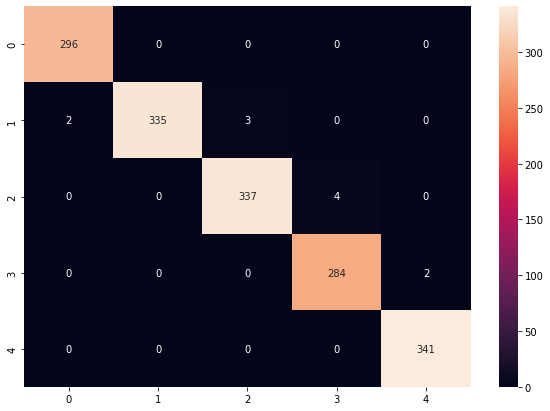

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list(df_val['classes']), list(df_val['pred']))
label = "01234"
print(cm)

df_cm = pd.DataFrame(cm, index = [i for i in label],
                  columns = [i for i in label])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt='g')

In [ ]:
#Visualize of how model predict by GRAD-CAM :
!pip install grad-cam

     |████████████████████████████████| 4.5 MB 14.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for grad-cam: filename=grad_cam-1.3.7-py3-none-any.whl size=25953 sha256=f159aefe8f1fc5de4d37d10cc68272621b4061548eda0e2884bfa3bab0890b29
  Stored in directory: /root/.cache/pip/wheels/30/ab/9c/53c523785edffdc6c61755cf82e0dac3342d0d36190c187894
Successfully built grad-cam


In [ ]:
from pytorch_grad_cam import GradCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM, FullGrad
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
from torchvision.models import resnet50

In [ ]:
import torch
import torch.nn as nn
from torch.utils import data
from torchvision.models import vgg19
from torchvision import transforms
from torchvision import datasets
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
!pip install pytorch-gradcam

     |████████████████████████████████| 6.0 MB 4.0 MB/s 
  Created wheel for pytorch-gradcam: filename=pytorch_gradcam-0.2.1-py3-none-any.whl size=5269 sha256=2a319dc72494aba01fe135f7df33fbb7a3aabe4732911d692a0e1e6ee377cd74
  Stored in directory: /root/.cache/pip/wheels/06/e7/da/b13a71980c3a787414e5ff8e156701c561c6322636396d71cc
Successfully built pytorch-gradcam


In [ ]:
# Reference from github : https://github.com/jacobgil/pytorch-grad-cam
!pip install grad-cam

     |████████████████████████████████| 4.5 MB 15.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for grad-cam: filename=grad_cam-1.3.7-py3-none-any.whl size=25953 sha256=290b0e753963ca28ed5c177515e4dd7722fc2b15c238dca4fea446e873987b85
  Stored in directory: /root/.cache/pip/wheels/30/ab/9c/53c523785edffdc6c61755cf82e0dac3342d0d36190c187894
Successfully built grad-cam


In [ ]:
from pytorch_grad_cam import GradCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM, FullGrad
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
from torchvision.models import resnet50

In [ ]:
model_x = resnet50(pretrained = True)
# model_x
target_layer_x = [model_x.layer4[-1]]
target_layer_x

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

[Bottleneck(
   (conv1): Conv2d(2048, 512, kernel_size=(1, 1), stride=(1, 1), bias=False)
   (bn1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
   (bn2): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (conv3): Conv2d(512, 2048, kernel_size=(1, 1), stride=(1, 1), bias=False)
   (bn3): BatchNorm2d(2048, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (relu): ReLU(inplace=True)
 )]

In [ ]:
cam_x = GradCAM(model = model_x, target_layers = target_layer_x, use_cuda=True)
cam_x

In [ ]:
# target_layer = [model_for_test.resnet_model.layer4[-1]]
# target_layer

[Bottleneck(
   (conv1): Conv2d(2048, 512, kernel_size=(1, 1), stride=(1, 1), bias=False)
   (bn1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (act1): ReLU(inplace=True)
   (conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
   (bn2): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (act2): ReLU(inplace=True)
   (conv3): Conv2d(512, 2048, kernel_size=(1, 1), stride=(1, 1), bias=False)
   (bn3): BatchNorm2d(2048, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (act3): ReLU(inplace=True)
 )]

<class 'numpy.ndarray'>


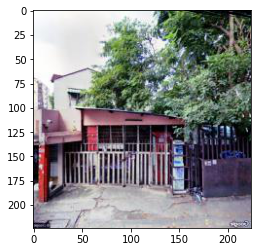

In [ ]:
img = plt.imread('/content/augmented_data/' + df_val['image_name'][250])
img=Image.fromarray(img).convert('RGB')
img=np.array(img).astype(np.uint8)
plt.imshow(img)
#img /255
print(type(img))
out = torchvision_transform(img)
out = out[np.newaxis, :]
out.shape

im = out

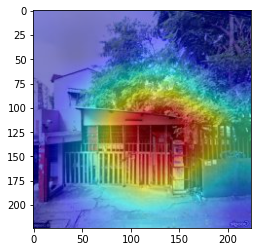

In [ ]:
grayscale_cam_x = cam_x(input_tensor=im, targets= None)
grayscale_cam_x.shape
# type(grayscale_cam_x)
visualization_x = show_cam_on_image(img / 255, grayscale_cam_x[0, :], use_rgb=True)
plt.imshow(visualization_x)

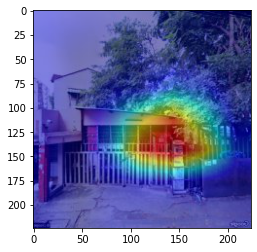

In [ ]:
target_layer = [model_HouseGrading.resnet_model.layer4[-1]]
cam = GradCAM(model = model_HouseGrading, target_layers = target_layer, use_cuda = True)
grayscale_cam = cam(input_tensor=im, targets=None)
visualization = show_cam_on_image(img / 255 ,grayscale_cam[0, :] , use_rgb=True)
plt.imshow(visualization)

In [ ]:
def _gradcam(model, img) :

  im = torchvision_transform(img)
  im = im[np.newaxis, :]

  target_layer = [model.resnet_model.layer4[-1]]
  cam = GradCAM(model = model, target_layers = target_layer, use_cuda = True)
  grayscale_cam = cam(input_tensor = im, targets=None)
  visualization = show_cam_on_image(img / 255 ,grayscale_cam[0, :] , use_rgb=True)

  return visualization

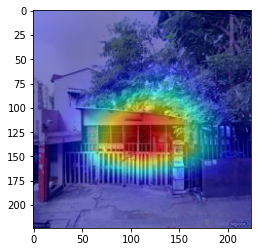

In [ ]:
img = plt.imread('/content/augmented_data/' + df_val['image_name'][250])
img=Image.fromarray(img).convert('RGB')
img=np.array(img).astype(np.uint8)

xx = _gradcam(model_HouseGrading, img)
plt.imshow(xx)

In [ ]:
# for idx, img in  enumerate(df_val) :
#   img = plt.imread('/content/augmented_data/' + img[idx])
#   img = Image.fromarray(img).convert('RGB')
#   img = np.array(img).astype(np.uint8)

#   res = _gradcam(model_HouseGrading, img)
#   ax.

In [ ]:
df_val

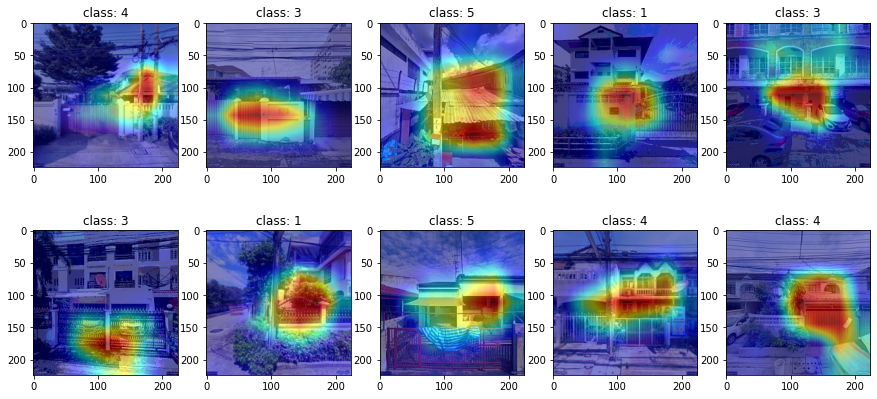

In [ ]:
# Plot Images
idxs = np.random.choice(range(len(df_val)), 10, replace=False)
fig,ax = plt.subplots(2,5,figsize = (15,7))
idx = 0
for i in range(2):
    for j in range(5):
        img = plt.imread('/content/augmented_data/' + (df_val['image_name'])[idxs[idx]])
        img = Image.fromarray(img).convert('RGB')
        img = np.array(img).astype(np.uint8)

        res = _gradcam(model_HouseGrading, img)


        #ax[i][j].imshow(img)
        ax[i][j].imshow(res)
        ax[i][j].set_title("class: "+str((df_val['pred'])[idxs[idx]] + 1))
        idx+=1

In [ ]:
idxs = np.random.choice(range(len(df_val)), 10, replace=False)
idxs[0]

1334

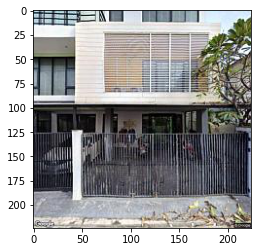

In [ ]:
plt.imshow(img)

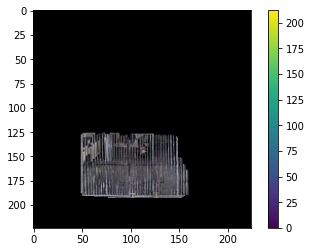

In [ ]:
#extract foreground :
mask = np.zeros(img.shape[:2], np.uint8)

backgroundModel = np.zeros((1, 65), np.float64)
foregroundModel = np.zeros((1, 65), np.float64)

rectangle = (20, 100, 150, 150)
cv2.grabCut(img, mask, rectangle, 
            backgroundModel, foregroundModel,
            3, cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask == 2)|(mask == 0), 0, 1).astype('uint8')
image = img * mask2[:, :, np.newaxis]

plt.imshow(image)
plt.colorbar()
plt.show()

In [ ]:
!pip uninstall opencv-python-headless -y 

!pip install opencv-python --upgrade

Found existing installation: opencv-python-headless 4.5.2.52
Uninstalling opencv-python-headless-4.5.2.52:
  Successfully uninstalled opencv-python-headless-4.5.2.52
     |████████████████████████████████| 60.5 MB 86 kB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30


In [ ]:
ii = cv2.imread('/content/augmented_data/' + df_val.image_name[0])
# ii.size
roi = cv2.selectROI(i)

error: ignored

In [ ]:
df_val.image_name[0]

'hg1459.jpg'

# Appendix : Data Augmentation

In [ ]:
import torchvision.transforms as transforms
from torchvision.utils import save_image
from torch.utils.data import Dataset
from PIL import Image
import time

In [ ]:
class TorchvisionDataset(Dataset):
    def __init__(self, file_paths,df, transform=None):
      
        self.file_paths = file_paths
        self.images = list(df['image_name'])
        self.transform = transform
        
    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        filename = self.images[idx]
        # Read an image with PIL
        image = Image.open(str(self.file_paths) + '/' + str(filename))
        
        
        start_t = time.time()
        if self.transform:
            image = self.transform(image)
        total_time = (time.time() - start_t)

        return image, total_time

In [ ]:
hg5.drop(hg5.index[hg5['image_size'] == 'width : 1920 height : 925'], inplace=True)
hg5

In [ ]:
from torchvision.transforms.functional import posterize
torchvision_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomAdjustSharpness(2, p = 0.5),
    transforms.RandomAutocontrast(p = 0.5),
    transforms.RandomPosterize(bits=2, p = 0.3), 
    transforms.RandomEqualize(p = 0.5),
    transforms.RandomHorizontalFlip(p = 0.5),
    transforms.ToTensor(),
])

torchvision_dataset = TorchvisionDataset(
    file_paths="/content/Task1:House_grade_prediction/train",
    df = hg5,
    transform=torchvision_transform,
)

In [ ]:
print(len(hg5))
hg1.columns

298


Index(['index', 'image_name', 'class', 'image_size'], dtype='object')

In [ ]:
%cd ..

/content


In [ ]:
!mkdir augmented_hg5
%cd /content/augmented_hg5
!pwd

/content/augmented_hg5
/content/augmented_hg5


In [ ]:
total_time = 0
img_num = 0

for k in range(6) :
  for i in range(len(hg5)):
    sample, transform_time = torchvision_dataset[i]
    total_time += transform_time
    save_image(sample, 'hg5' + str(img_num) + '.jpg')
    img_num += 1
  print('round : {}'.format(k))
print("torchvision time/sample: {} ms".format(total_time*10))

# plt.figure(figsize=(10, 10))
# plt.imshow(transforms.ToPILImage()(sample))
# plt.show()

round : 0
round : 1
round : 2
round : 3
round : 4
round : 5
torchvision time/sample: 179.04175281524658 ms


In [ ]:
# Pause here : 
import os
from os import walk
len(os.listdir('/content/augmented_hg5'))

1788

In [ ]:
def gen_df(mypath, cla) :
  filenames = next(walk(mypath), (None, None, []))[2]
  df = pd.DataFrame(filenames)
  df.rename(columns = {0 : 'image_name'})
  c = list(str(cla)*len(filenames))
  df['class'] = pd.DataFrame(c)
  return df

In [ ]:
df1_hg = gen_df('/content/augmented_hg1',1)
df1_hg

,0,class
0,hg1839.jpg,1
1,hg1322.jpg,1
2,hg1966.jpg,1
3,hg1711.jpg,1
4,hg11096.jpg,1
...,...,...
1355,hg1241.jpg,1
1356,hg11127.jpg,1
1357,hg1870.jpg,1
1358,hg1367.jpg,1


In [ ]:
df2_hg = gen_df('/content/augmented_hg2',2)
df3_hg = gen_df('/content/augmented_hg3',3)
df4_hg = gen_df('/content/augmented_hg4',4)
df5_hg = gen_df('/content/augmented_hg5',5)


In [ ]:
df0_hg = gen_df('/content/augmented_hg0',0)
df0_hg

,0,class
0,hg0992.jpg,0
1,hg0710.jpg,0
2,hg01006.jpg,0
3,hg070.jpg,0
4,hg0862.jpg,0
...,...,...
1449,hg0458.jpg,0
1450,hg01371.jpg,0
1451,hg01040.jpg,0
1452,hg01108.jpg,0


In [ ]:
traindf = pd.concat([df0_hg, df1_hg, df2_hg, df3_hg, df4_hg, df5_hg])
traindf = traindf.rename(columns = {0 : 'image_name'})
traindf = traindf.reset_index()

In [ ]:
(traindf['image_name'])[0]

'hg0992.jpg'

In [ ]:
import os 
l0 = len(os.listdir('/content/augmented_hg0'))
l1 = len(os.listdir('/content/augmented_hg1'))
l2 = len(os.listdir('/content/augmented_hg2'))
l3 = len(os.listdir('/content/augmented_hg3'))
l4 = len(os.listdir('/content/augmented_hg4'))
l5 = len(os.listdir('/content/augmented_hg5'))
l1 + l2+ l3+ l4+ l5 +l0

9472

In [ ]:
%cd ..
!pwd

/content
/content


In [ ]:
!mkdir augmented_data
!cp /content/augmented_hg1/*.jpg /content/augmented_data

In [ ]:
!cp /content/augmented_hg2/*.jpg /content/augmented_data/

In [ ]:
!cp /content/augmented_hg3/*.jpg /content/augmented_data/
!cp /content/augmented_hg4/*.jpg /content/augmented_data/
!cp /content/augmented_hg5/*.jpg /content/augmented_data/

In [ ]:
!cp /content/augmented_hg0/*.jpg /content/augmented_data/

In [ ]:
len(os.listdir('/content/augmented_data'))

9472

In [ ]:
# traindf = traindf.rename(columns = {0 : 'image_name'})
(traindf['image_name'])[0]

'hg0992.jpg'

In [ ]:
import plotly.express as px

fig = px.histogram(traindf, x="class")
fig.update_layout(bargap=0.2)
fig.show()

In [ ]:
train_df = traindf

In [ ]:
train_df = train_df.rename(columns = {'class' : 'classes'})

In [ ]:
# a = train_df.loc[train_df['classes'] == '3'].index


In [ ]:
# b = train_df.loc[train_df['classes'] == '5'].index


In [ ]:
# import pandas as pd
# import numpy as np
# np.random.seed(10)

# remove_n = 1500
# drop_indices = np.random.choice(b, remove_n, replace=False)
# train_df = train_df.drop(drop_indices)

In [ ]:
train_df

,index,image_name,classes
0,0,hg0992.jpg,0
1,1,hg0710.jpg,0
2,2,hg01006.jpg,0
3,3,hg070.jpg,0
4,4,hg0862.jpg,0
...,...,...,...
9467,1783,hg5371.jpg,5
9468,1784,hg5370.jpg,5
9469,1785,hg51384.jpg,5
9470,1786,hg51134.jpg,5


In [ ]:
import plotly.express as px

fig = px.histogram(train_df, x="classes")
fig.update_layout(bargap=0.2)
fig.show()

In [ ]:
!zip -r augmented_data_10000.zip /content/augmented_data

In [ ]:
!pwd

/content


In [ ]:
import shutil

train_df.to_csv('augmented10000_data.csv',index = False)
shutil.copy('/content/augmented10000_data.csv', '/content/drive/MyDrive/Hack5:Image_classification/Datasets')
shutil.copy('/content/augmented_data_10000.zip', '/content/drive/MyDrive/Hack5:Image_classification/Datasets')


'/content/drive/MyDrive/Hack5:Image_classification/Datasets/augmented_data_10000.zip'

In [ ]:
import timm
from pprint import pprint

timm.list_models('*resnet*')

['cspresnet50',
 'cspresnet50d',
 'cspresnet50w',
 'eca_resnet33ts',
 'ecaresnet26t',
 'ecaresnet50d',
 'ecaresnet50d_pruned',
 'ecaresnet50t',
 'ecaresnet101d',
 'ecaresnet101d_pruned',
 'ecaresnet200d',
 'ecaresnet269d',
 'ecaresnetlight',
 'ens_adv_inception_resnet_v2',
 'gcresnet33ts',
 'gcresnet50t',
 'gluon_resnet18_v1b',
 'gluon_resnet34_v1b',
 'gluon_resnet50_v1b',
 'gluon_resnet50_v1c',
 'gluon_resnet50_v1d',
 'gluon_resnet50_v1s',
 'gluon_resnet101_v1b',
 'gluon_resnet101_v1c',
 'gluon_resnet101_v1d',
 'gluon_resnet101_v1s',
 'gluon_resnet152_v1b',
 'gluon_resnet152_v1c',
 'gluon_resnet152_v1d',
 'gluon_resnet152_v1s',
 'inception_resnet_v2',
 'lambda_resnet26rpt_256',
 'lambda_resnet26t',
 'lambda_resnet50ts',
 'legacy_seresnet18',
 'legacy_seresnet34',
 'legacy_seresnet50',
 'legacy_seresnet101',
 'legacy_seresnet152',
 'nf_ecaresnet26',
 'nf_ecaresnet50',
 'nf_ecaresnet101',
 'nf_resnet26',
 'nf_resnet50',
 'nf_resnet101',
 'nf_seresnet26',
 'nf_seresnet50',
 'nf_seresnet1

In [ ]:
model_res = timm.create_model(
                    'resnet50',
                    pretrained=True)


Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-rsb-weights/resnet50_a1_0-14fe96d1.pth" to /root/.cache/torch/hub/checkpoints/resnet50_a1_0-14fe96d1.pth


In [ ]:
model_res.default_cfg

{'architecture': 'resnet50',
 'classifier': 'fc',
 'crop_pct': 0.95,
 'first_conv': 'conv1',
 'input_size': (3, 224, 224),
 'interpolation': 'bicubic',
 'mean': (0.485, 0.456, 0.406),
 'num_classes': 1000,
 'pool_size': (7, 7),
 'std': (0.229, 0.224, 0.225),
 'url': 'https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-rsb-weights/resnet50_a1_0-14fe96d1.pth'}

In [ ]:
x = torch.randn(64, 3, 224, 224)
model_res(x).shape

torch.Size([64, 1000])

In [ ]:
model_res.default_cfg

{'architecture': 'resnet50',
 'classifier': 'fc',
 'crop_pct': 0.95,
 'first_conv': 'conv1',
 'input_size': (3, 224, 224),
 'interpolation': 'bicubic',
 'mean': (0.485, 0.456, 0.406),
 'num_classes': 1000,
 'pool_size': (7, 7),
 'std': (0.229, 0.224, 0.225),
 'url': 'https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-rsb-weights/resnet50_a1_0-14fe96d1.pth'}

In [ ]:
from PIL import Image

In [ ]:
im_path = '/content/Task1:House_grade_prediction/train/'
image = Image.open(im_path + (HG_dataset['image_name'])[0])
image = torch.as_tensor(np.array(image, dtype=np.float32)).transpose(2, 0)[None]

In [ ]:
feature_output = model_res.forward_features(image)

In [ ]:
def visualize_feature_output(t) : 
  plt.imshow(feature_output[0].transpose(0, 2).sum(-1).detach().numpy())
  plt.show()

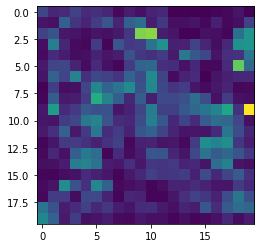

In [ ]:
visualize_feature_output(feature_output)

In [ ]:
model_res.feature_info

[{'module': 'act1', 'num_chs': 64, 'reduction': 2},
 {'module': 'layer1', 'num_chs': 256, 'reduction': 4},
 {'module': 'layer2', 'num_chs': 512, 'reduction': 8},
 {'module': 'layer3', 'num_chs': 1024, 'reduction': 16},
 {'module': 'layer4', 'num_chs': 2048, 'reduction': 32}]

In [ ]:
model_res.layer4

In [ ]:
model_eff = timm.create_model(
                    'tf_efficientnetv2_b2',
                    pretrained=True)


In [ ]:
model_eff.feature_info

[{'hook_type': '',
  'module': 'blocks.0.1',
  'num_chs': 16,
  'reduction': 2,
  'stage': 1},
 {'hook_type': '',
  'module': 'blocks.1.2',
  'num_chs': 32,
  'reduction': 4,
  'stage': 2},
 {'hook_type': '',
  'module': 'blocks.2.2',
  'num_chs': 56,
  'reduction': 8,
  'stage': 3},
 {'hook_type': '',
  'module': 'blocks.4.5',
  'num_chs': 120,
  'reduction': 16,
  'stage': 5},
 {'hook_type': '',
  'module': 'blocks.5.9',
  'num_chs': 208,
  'reduction': 32,
  'stage': 6}]

In [ ]:
dir(model_eff)
f = model_eff.forward_features(image)

In [ ]:
image.shape

torch.Size([1, 3, 640, 640])

In [ ]:
out = model_eff(image)
len(out)

1

In [ ]:
out.shape

torch.Size([1, 1000])

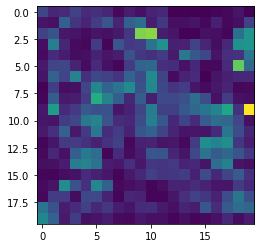

In [ ]:
visualize_feature_output(out)

In [ ]:
from torchvision.models.feature_extraction import get_graph_node_names, create_feature_extractor

In [ ]:
model_res = timm.create_model(
                    'resnet50',
                    exportable = True,
                    pretrained=True)

In [ ]:
nodes, _ = get_graph_node_names(model_res)
nodes

['x',
 'conv1',
 'bn1',
 'act1',
 'maxpool',
 'layer1.0.conv1',
 'layer1.0.bn1',
 'layer1.0.act1',
 'layer1.0.conv2',
 'layer1.0.bn2',
 'layer1.0.act2',
 'layer1.0.conv3',
 'layer1.0.bn3',
 'layer1.0.downsample.0',
 'layer1.0.downsample.1',
 'layer1.0.add',
 'layer1.0.act3',
 'layer1.1.conv1',
 'layer1.1.bn1',
 'layer1.1.act1',
 'layer1.1.conv2',
 'layer1.1.bn2',
 'layer1.1.act2',
 'layer1.1.conv3',
 'layer1.1.bn3',
 'layer1.1.add',
 'layer1.1.act3',
 'layer1.2.conv1',
 'layer1.2.bn1',
 'layer1.2.act1',
 'layer1.2.conv2',
 'layer1.2.bn2',
 'layer1.2.act2',
 'layer1.2.conv3',
 'layer1.2.bn3',
 'layer1.2.add',
 'layer1.2.act3',
 'layer2.0.conv1',
 'layer2.0.bn1',
 'layer2.0.act1',
 'layer2.0.conv2',
 'layer2.0.bn2',
 'layer2.0.act2',
 'layer2.0.conv3',
 'layer2.0.bn3',
 'layer2.0.downsample.0',
 'layer2.0.downsample.1',
 'layer2.0.add',
 'layer2.0.act3',
 'layer2.1.conv1',
 'layer2.1.bn1',
 'layer2.1.act1',
 'layer2.1.conv2',
 'layer2.1.bn2',
 'layer2.1.act2',
 'layer2.1.conv3',
 'layer2

In [ ]:
features = {'layer1.2.act3' : 'out'}
feature_extractor = create_feature_extractor(model_res, return_nodes = features)

In [ ]:
feature_extractor

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Module(
    (0): Module(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act1): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act2): ReLU(inplace=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (downsample): Module(
        (0): Conv2d(64, 256, kernel_siz

In [ ]:
out_1 = feature_extractor(image)

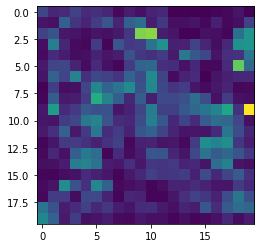

In [ ]:
visualize_feature_output(out_1)